## Validation Curve For Lasso Model

Given is the dataset `dummy.csv` which contains several features `x1`, `x2`, ... `x10` and a numeric target variable `y`.

In [1]:
import pandas as pd

# Read dataset
dummy = pd.read_csv('../resources/dummy.csv')
dummy.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.975936,1.124385,1.365468,0.613524,-0.855709,-0.626311,-0.944523,0.087888,0.592770,-0.245974,0.045651
1,0.159770,-0.883446,-1.082025,-0.447179,-0.030062,-0.281831,1.424186,-0.688504,-1.371289,-1.751935,-0.960967
2,1.940494,1.124385,0.992516,0.007408,-0.887465,-0.612532,-0.722456,0.087888,0.213380,-0.413303,-0.086799
3,-1.620953,-0.883446,-0.219575,-0.674472,0.446273,0.689604,-0.796478,0.864279,0.654729,-0.078645,0.774124
4,0.308164,-0.883446,-0.755692,0.613524,0.255739,0.482916,0.091787,0.087888,-0.562449,-0.831625,-0.166269


Your task is to select a suitable $\alpha$ value for a lasso model. For this purpose, you create a validation curve that represents the cross-validated $R^2$ of the model as a function of $\alpha$.

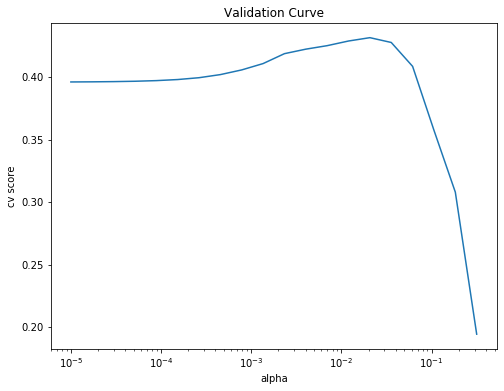

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Create feature matrix and target vector
X = dummy.drop('y', axis=1)
y = dummy['y']

# Define hyperparameter space
alphas = np.logspace(-5, -.5, 20)
params = [{'alpha': alphas}]

# Fit cross-validated lasso model
lasso = Lasso(random_state=0, max_iter=5000)
clf = GridSearchCV(lasso, params)
clf.fit(X, y)

# Get average test scores
test_scores = clf.cv_results_['mean_test_score']

# Create plot
plt.figure(figsize=(8, 6))
plt.title("Validation Curve")
plt.semilogx(alphas, test_scores)
plt.xlabel('alpha')
plt.ylabel('cv score')
plt.show()

As a **bonus task** you may visualize the **standard deviation** as well.

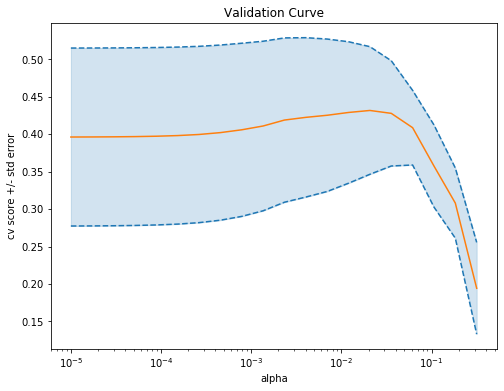

In [3]:
# Get standard deviation of test scores
test_scores_std = clf.cv_results_['std_test_score']

# Create plot
plt.figure(figsize=(8, 6))
plt.title("Validation Curve")
plt.semilogx(alphas, test_scores + test_scores_std, color='C0', ls='--')
plt.semilogx(alphas, test_scores - test_scores_std, color='C0', ls='--')
plt.fill_between(alphas, test_scores - test_scores_std, test_scores + test_scores_std, color='C0', alpha=0.2)
plt.semilogx(alphas, test_scores, color='C1')
plt.xlabel('alpha')
plt.ylabel('cv score +/- std error')
plt.show()